# Does the Light and Dark Theme matter

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.stats as stats

# Table of Contents
[Table of Contents](#Table-of-Contents)
[Introduction](#Introduction)
[Research Question](#Research-Question)
[Quantitative Question](#Quantitative-Question)
[Hypothesis](#Hypothesis)
[Experimental Design](#Experimental-Design)
[Data Gathering](#Data-Gathering)
[Exploratory Data Analysis](#Exploratory-Data-Analysis)
[Assessing Assumptions](#Assessing-Assumptions)
[Testing Hypothesis I](#Testing-Hypothesis-I)
[Testing Hypothesis II](#Testing-Hypothesis-II)
[Limitations](#Limitations)
[Reflections](#Reflections)
[Conclusion](#Conclusion)
[Sources](#Sources)
[Simulations](#Simulations)
[P-Hacking](#P-Hacking)

In [ ]:
Random Sample errors avoided

test if the data is normally distributed?? for ratings Levee;s test [YouTube Video Guide](https://youtu.be/VekJxtk4BYM?t=293)
[How to calculate t value](https://youtu.be/VekJxtk4BYM?t=491)

# Introduction
In the world of digital interfaces, the choice between light and dark themes is a topic of ongoing debate. This study undertakes a simple exploration: do these themes matter to users? I approach this question with a meticulous investigation, aiming to provide straightforward answers. By understanding the user perspective in clear terms, I try to contribute valuable insights to the conversation on interface design.

# Research Question
Does Dark Mode and Light Mode of the same website have different effect on the user satisfaction?

# Quantitative Question
Participants of the study were asked question:
On a scale of 1 to 10, how satisfied are you with the overall design and appearance of the layout you experienced?
(1 - Not Satisfied; 10 - Highly Satisfied)
In addition to questionnaire we have also measured engagement time.

# Hypothesis
## Hypothesis I
Null Hypothesis: "Mean Rating of Dark Mode $\mu_{dark}$ and mean Rating of Light Mode $\mu_{light}$ of the same website are the same."
Alternative Hypothesis: "Mean Rating of Dark Mode $\mu_{dark}$ and mean Rating of Light Mode $\mu_{light}$ of the same website are not the same."

$$H_{0} : \mu_{dark} = \mu_{light}$$
$$H_{a} : \mu_{dark} \neq \mu_{light}$$

## Hypothesis II
Null Hypothesis: "Mean Engagement Time of Dark Mode $\mu_{dark}$ and mean Engagement Time of Light Mode $\mu_{light}$ of the same website are the same."
Alternative Hypothesis: "Mean Engagement Time of Dark Mode $\mu_{dark}$ and mean Engagement Time of Light Mode $\mu_{light}$ of the same website are not the same."

$$H_{0} : \mu_{dark} = \mu_{light}$$
$$H_{a} : \mu_{dark} \neq \mu_{light}$$

# Experimental Design
We did *independent samples t-test* with *95% Confidence Interval* where participants were sampled with usage of *randomized controlled trial (RCT)*. *The explanatory variable was dark mode or light mode option*, *the response variables were rating of website and engagement time* and *the experimental units were people*. One group was offered a website with dark mode and the other group was offered a website with light mode. The aim was to get *80 responses* (40 for each group) in the period of 2 weeks.
People were randomly selected for the test using this schema:
* Random number between 1 and 2 (1 dark mode, 2 light mode)
* Find first person
* Depending on the random number first person is shown appropriate website
* Find second person
* Depending on the random number second person is shown other website
* Repeat

```mermaid
graph LR
A[Random number 1 or 2] --> B
B[Find first person] --> C
C[shown appropriate website] --> D
D[Find second person] --> E
E[shown other website] --Repeat--> A
```

In order for the experiment inference to be valuable those conditions need to be met:
* Random: A random sample or randomized experiment should be used to obtain the data.
* Normal: The sampling distribution of sample x (the sample mean) needs to be approximately normal. This is true if our parent population is normal or if our sample is reasonably large (n $\ge$ 30).
* Independent: Individual observations need to be independent. If sampling without replacement, our sample size shouldn't be more than 10% of the population.

*Random* was met with the usage of *RTC* sampling method.
*Normal* was met by having two sample groups of 40 participants.
*Independent* sample size smaller than 10% of population.

Avoiding Bias in samples and surveys:
https://www.khanacademy.org/math/probability/xa88397b6:study-design/xa88397b6:potential-problems-sampling/a/identifying-bias-in-samples-and-surveys

# Data Gathering
Data is grouped into dataframes with the unique Id of participant, specified Theme that they were shown, Rating given by participant and their Engagement Time

In [28]:
dark_data_dict = {
  "Theme": {
    "0": "Dark",
    "1": "Dark",
    "2": "Dark",
    "3": "Dark",
    "4": "Dark",
    "5": "Dark",
    "6": "Dark",
    "7": "Dark",
    "8": "Dark",
    "9": "Dark",
    "10": "Dark",
    "11": "Dark",
    "12": "Dark",
    "13": "Dark",
    "14": "Dark",
    "15": "Dark",
    "16": "Dark",
    "17": "Dark",
    "18": "Dark",
    "19": "Dark",
    "20": "Dark",
    "21": "Dark",
    "22": "Dark",
    "23": "Dark",
    "24": "Dark",
    "25": "Dark",
    "26": "Dark",
    "27": "Dark",
    "28": "Dark",
    "29": "Dark",
    "30": "Dark",
    "31": "Dark",
    "32": "Dark",
    "33": "Dark",
    "34": "Dark",
    "35": "Dark",
    "36": "Dark",
    "37": "Dark",
    "38": "Dark",
    "39": "Dark"
  },
  "Rating": {
    "0": 7,
    "1": 4,
    "2": 8,
    "3": 5,
    "4": 7,
    "5": 10,
    "6": 3,
    "7": 7,
    "8": 8,
    "9": 5,
    "10": 4,
    "11": 8,
    "12": 8,
    "13": 3,
    "14": 6,
    "15": 5,
    "16": 2,
    "17": 8,
    "18": 6,
    "19": 2,
    "20": 5,
    "21": 1,
    "22": 10,
    "23": 6,
    "24": 9,
    "25": 1,
    "26": 10,
    "27": 3,
    "28": 7,
    "29": 4,
    "30": 9,
    "31": 3,
    "32": 5,
    "33": 3,
    "34": 7,
    "35": 5,
    "36": 9,
    "37": 7,
    "38": 2,
    "39": 4
  },
  "EngagementTime": {
    "0": 44,
    "1": 31,
    "2": 42,
    "3": 44,
    "4": 38,
    "5": 41,
    "6": 44,
    "7": 45,
    "8": 42,
    "9": 42,
    "10": 46,
    "11": 34,
    "12": 37,
    "13": 42,
    "14": 44,
    "15": 39,
    "16": 37,
    "17": 41,
    "18": 48,
    "19": 44,
    "20": 44,
    "21": 40,
    "22": 41,
    "23": 40,
    "24": 39,
    "25": 42,
    "26": 38,
    "27": 48,
    "28": 45,
    "29": 54,
    "30": 42,
    "31": 42,
    "32": 43,
    "33": 38,
    "34": 33,
    "35": 38,
    "36": 40,
    "37": 41,
    "38": 40,
    "39": 36
  }
}

dark_data_frame = pd.DataFrame.from_dict(dark_data_dict)

In [29]:
light_data_dict = {
  "Theme": {
    "0": "Light",
    "1": "Light",
    "2": "Light",
    "3": "Light",
    "4": "Light",
    "5": "Light",
    "6": "Light",
    "7": "Light",
    "8": "Light",
    "9": "Light",
    "10": "Light",
    "11": "Light",
    "12": "Light",
    "13": "Light",
    "14": "Light",
    "15": "Light",
    "16": "Light",
    "17": "Light",
    "18": "Light",
    "19": "Light",
    "20": "Light",
    "21": "Light",
    "22": "Light",
    "23": "Light",
    "24": "Light",
    "25": "Light",
    "26": "Light",
    "27": "Light",
    "28": "Light",
    "29": "Light",
    "30": "Light",
    "31": "Light",
    "32": "Light",
    "33": "Light",
    "34": "Light",
    "35": "Light",
    "36": "Light",
    "37": "Light",
    "38": "Light",
    "39": "Light"
  },
  "Rating": {
    "0": 3,
    "1": 1,
    "2": 8,
    "3": 3,
    "4": 3,
    "5": 1,
    "6": 5,
    "7": 10,
    "8": 7,
    "9": 10,
    "10": 9,
    "11": 7,
    "12": 9,
    "13": 8,
    "14": 2,
    "15": 1,
    "16": 7,
    "17": 7,
    "18": 8,
    "19": 5,
    "20": 3,
    "21": 8,
    "22": 6,
    "23": 3,
    "24": 1,
    "25": 3,
    "26": 5,
    "27": 3,
    "28": 1,
    "29": 5,
    "30": 10,
    "31": 7,
    "32": 7,
    "33": 9,
    "34": 10,
    "35": 10,
    "36": 3,
    "37": 7,
    "38": 1,
    "39": 4
  },
  "EngagementTime": {
    "0": 36,
    "1": 31,
    "2": 36,
    "3": 36,
    "4": 35,
    "5": 35,
    "6": 33,
    "7": 35,
    "8": 32,
    "9": 35,
    "10": 40,
    "11": 38,
    "12": 34,
    "13": 33,
    "14": 38,
    "15": 36,
    "16": 38,
    "17": 35,
    "18": 39,
    "19": 33,
    "20": 42,
    "21": 31,
    "22": 36,
    "23": 32,
    "24": 35,
    "25": 40,
    "26": 34,
    "27": 32,
    "28": 37,
    "29": 35,
    "30": 32,
    "31": 38,
    "32": 32,
    "33": 35,
    "34": 37,
    "35": 37,
    "36": 33,
    "37": 33,
    "38": 37,
    "39": 37
  }
}

light_data_frame = pd.DataFrame.from_dict(light_data_dict)

# Exploratory Data Analysis

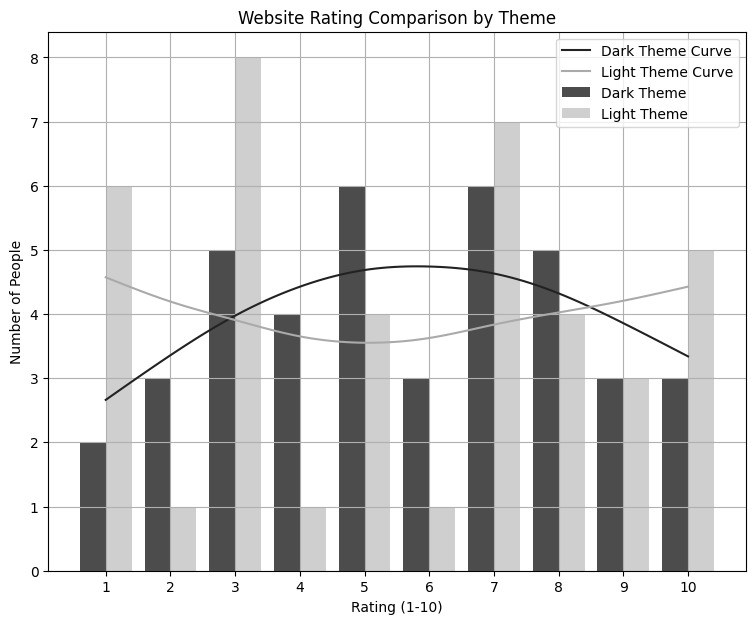

In [30]:
### Ratings
# Concatenate the two DataFrames to create the full dataset
dataset = pd.concat([dark_data_frame, light_data_frame], ignore_index=True)

# Create separate data for "Light" and "Dark" themes
dark_ratings = dataset[dataset['Theme'] == 'Dark']['Rating']
light_ratings = dataset[dataset['Theme'] == 'Light']['Rating']

# Calculate rating distributions for each theme
dark_rating_counts = dark_ratings.value_counts().sort_index()
light_rating_counts = light_ratings.value_counts().sort_index()

# Create a bar chart to compare website ratings by theme
width = 0.4  # Width of the bars

# Creating plot
plt.figure(figsize=(9, 7))
plt.bar(dark_rating_counts.index - width / 2, dark_rating_counts.values, width, color='#000000', label='Dark Theme',
        alpha=0.7)
plt.bar(light_rating_counts.index + width / 2, light_rating_counts.values, width, color='#bbbbbb', label='Light Theme',
        alpha=0.7)

# Plot Features
plt.title('Website Rating Comparison by Theme')
plt.xlabel('Rating (1-10)')
plt.ylabel('Number of People')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

# Calculate smoothed curves for dark and light themes
x = dark_rating_counts.index
dark_curve = interp.make_smoothing_spline(dark_rating_counts.index, dark_rating_counts.values)
light_curve = interp.make_smoothing_spline(light_rating_counts.index, light_rating_counts.values)

# Plot the smoothed curves
x_smooth = np.linspace(x.min(), x.max(), 100)
plt.plot(x_smooth, dark_curve(x_smooth), linestyle='-', color='#222222', label='Dark Theme Curve')
plt.plot(x_smooth, light_curve(x_smooth), linestyle='-', color='#aaaaaa', label='Light Theme Curve')

plt.legend()

plt.show()

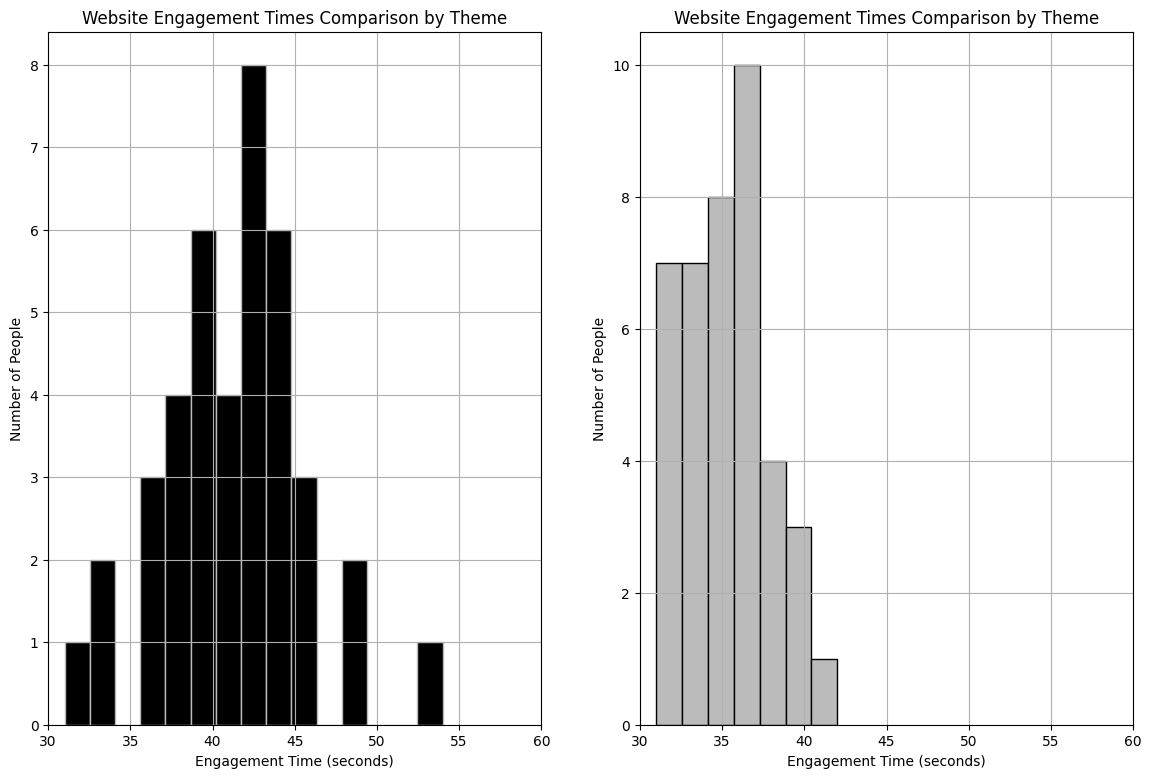

In [31]:
### Times
# Concatenate the two DataFrames to create the full dataset
dataset = pd.concat([dark_data_frame, light_data_frame], ignore_index=True)

# Create separate data for "Light" and "Dark" themes
dark_engagement_times = dataset[dataset['Theme'] == 'Dark']['EngagementTime']
light_engagement_times = dataset[dataset['Theme'] == 'Light']['EngagementTime']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 9))
bin_width = 1.5
ax1.hist(dark_engagement_times.values, int((max(dark_engagement_times.values) - min(dark_engagement_times.values)) / bin_width), color='#000000', edgecolor='#bbbbbb')
ax2.hist(light_engagement_times.values, int((max(light_engagement_times.values) - min(light_engagement_times.values)) / bin_width), color='#bbbbbb', edgecolor='#000000')

ax1.set_title('Website Engagement Times Comparison by Theme')
ax1.set_xlabel('Engagement Time (seconds)')
ax1.set_ylabel('Number of People')
ax1.grid(True)

ax2.set_title('Website Engagement Times Comparison by Theme')
ax2.set_xlabel('Engagement Time (seconds)')
ax2.set_ylabel('Number of People')
ax2.grid(True)

ax1.set_xlim(30, 60)
ax2.set_xlim(30, 60)

plt.show()

In [32]:
# Calculate and compare the mean ratings
mean_ratings = dataset.groupby('Theme')['Rating'].mean().reset_index()
print(mean_ratings)

# Calculate and compare the mean engagement times
mean_engagement_times = dataset.groupby('Theme')['EngagementTime'].mean().reset_index()
print(mean_engagement_times)

   Theme  Rating
0   Dark    5.65
1  Light    5.50
   Theme  EngagementTime
0   Dark          41.225
1  Light          35.325


# Assessing Assumptions

In [33]:
# Perform independent samples t-test
t_value, p_value = stats.ttest_ind(dataset[dataset['Theme'] == 'Dark']["Rating"], dataset[dataset['Theme'] == 'Light']["Rating"])

print("T-Statistic for Rating:", t_value)
print("P-Value for Rating:", p_value)

T-Statistic for Rating: 0.23658388427944485
P-Value for Rating: 0.8135998245893583


In [34]:
### T test for Engagement Time mean
# Perform independent samples t-test
t_value, p_value = stats.ttest_ind(dataset[dataset['Theme'] == 'Dark']["EngagementTime"], dataset[dataset['Theme'] == 'Light']["EngagementTime"])

print("T-Statistic for Engagement Time:", t_value)
print("P-Value for Engagement Time:", ("%.17f" % p_value).rstrip('0').rstrip('.'))

T-Statistic for Engagement Time: 7.460106557815275
P-Value for Engagement Time: 0.00000000010373668


# Testing Hypothesis I
With P-Value of 0.8135998245893583 and the confidence interval of 95% we cannot reject Null Hypothesis

# Testing Hypothesis II
With P-Value of 0.00000000010373668 and the confidence interval of 95% we can reject Null Hypothesis

# Limitations
It is essential to acknowledge the constraints that influence the scope of research study.
Firstly, the participant pool leaned heavily towards male Information and Communication Technology (ICT) students, aged between 20 and 25, with a smaller representation from Physiotherapy students. This demographic bias could restrict the generalizability of the findings to a broader audience.
Secondly, the study encompassed a sample size of 80 participants. While it offered some insights, a larger and more diverse sample would enhance the study's reliability and applicability.
Additionally, this research marks the initial exploration of this particular topic. Consequently, despite rigorous methodologies, the study’s novelty might pose challenges in terms of comprehensive coverage and depth of analysis. These limitations, while significant, provide valuable pointers for future studies, encouraging a broader and more inclusive approach to understanding user preferences in interface themes.

# Reflections
This study gave a good insight into creating experiments, but I believe that in the end it took on too broad topic. It was nice to learn all of the requirements of the research study, but ultimatelly with the resources I had, I was not able to make accualy meaningful study on this topic

# Conclusion
 The study results do not yield a definitive conclusion regarding the superiority of Dark Mode or Light Mode for user satisfaction. The intricate interplay of user preferences and contexts renders a precise determination challenging. To comprehensively understand the impact of interface themes on user satisfaction within the same website, further research involving diverse user groups and scenarios is imperative.

# Sources
[Z-statistics Formula: Two-sample Z-test for means](https://vitalflux.com/two-samples-z-test-for-means-formula-examples/)
[Independent Samples Z-Test](https://www.statstest.com/independent-samples-z-test/#:~:text=The%20Independent%20Samples%20Z%2DTest,spread%20between%20your%202%20groups.)
[T-test/Z-test decision diagram](https://vitalflux.com/wp-content/uploads/2022/01/z-test-vs-t-test.jpg)
[T-test/Z-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/#:~:text=A.,the%20population%20variance%20is%20unknown.)
[Khan Academy](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-proportion/v/calculating-p-value-from-z-table)
[Khan Academy](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/when-to-use-z-or-t-statistics-in-significance-tests)
[T-tests](https://www.youtube.com/watch?v=VekJxtk4BYM)
[Research Question](https://research.com/research/how-to-write-a-research-question#:~:text=A%20research%20question%20is%20a,answered%20in%20the%20study's%20conclusion.)
[Quantitative Research Questions](https://www.voxco.com/blog/quantitative-survey-questions/#:~:text=Quantitative%20research%20questions%20are%20objective,that%20can%20be%20examined%20statistically.)

# Simulations

# P-Hacking